# Computational Linear Algebra: PCA Homework

## Exercise 0.0: Initialization
Fill the missing values in this text box. **Remove the information of the second student if you are not working in a team**.

**Academic Year:** 2025/2026

### Team Members (Alphabetical Order):
1. Baiocchi, Lucio (360244);
2. Passafiume, Leonardo (358616).

Now, fill the python list below with the Student IDs of the team

In [15]:
StudentIDs = [360244,358616]  # <-------- Fill this list with Student IDs of the team

## Exercise 0.1: Starting Code-Cell 

Download the .csv files from the web page of the course (*responses_hw.csv* and *columns_hw.csv*) and past them in **the same folder of this notebook**.


Then, run the cell below, **without modifing any line of code**.

The output of this code cell is **your personal subset of the original dataset**, with 2/3 of the original features (i.e., columns) and 3/4 of the original persons (i.e., rows).

### ATTENTION: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL, ANY CHANGE CAN INVALIDATE THE HOMEWORK!

In [16]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np
import pandas as pd
from IPython.display import display

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']
features_all = []
for tt in variables_by_type.keys():
    if tt != 'Demographics':
        features_all += variables_by_type[tt]

def which_features(*StudentIDs):
    random_seed = min(StudentIDs)
    np.random.seed(random_seed)
    features_ = np.random.choice(features_all, int((2 * len(features_all)) / 3), replace=False).tolist()
    features = []
    features_by_type = {tt: [] for tt in variables_by_type.keys() if tt != 'Demographics'}
    for tt in variables_by_type.keys():
        ft_list = variables_by_type[tt]
        for ii in range(len(ft_list)):
            if ft_list[ii] in features_:
                features.append(ft_list[ii])
                features_by_type[tt].append(ft_list[ii])

    return features, features_by_type

features, features_by_type = which_features(*StudentIDs)

print(f'*** THESE ARE THE {len(features)} SELECTED FEATURES (SEE VARIABLE features):')
for ff in features:
    print(f'{ff}')
print('*************************************')
print('')
print('*** SELECTED FEATURES BY TYPES (SEE VARIABLE features_by_type):')
for tt in features_by_type.keys():
    print(f'{tt}: {features_by_type[tt]}')
    print('')
print('*************************************')
print('')
print('*** THESE ARE THE LABELS (SEE VARIABLE labels):')
for ll in labels:
    print(f'{ll}')
print('*************************************')

def which_rows(df, frac, *StudentIDs):
    random_seed = min(StudentIDs)
    df_ = df.sample(frac=frac, random_state=random_seed)
    return df_

responses_hw = pd.read_csv('responses_hw.csv', index_col=0)
responses = which_rows(responses_hw, 0.75, *StudentIDs)
responses = responses.loc[:, features + labels]

responses_ft = responses.loc[:, features]
responses_lb = responses.loc[:, labels]

print('')
print('*** THIS IS YOUR PERSONAL DATASET (features AND labels TOGETHER, SEE VARIABLE responses)')
display(responses)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)')
display(responses_ft)
print('')
print('*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)')
display(responses_lb)

random_seed = min(StudentIDs)
np.random.seed(random_seed)

your_scaler = np.random.choice(['StandardScaler', 'MinMaxScaler'])


*** THESE ARE THE 93 SELECTED FEATURES (SEE VARIABLE features):
Finances
Branded clothing
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
Smoking
Alcohol
Healthy eating
Psychology
Politics
Internet
PC
Chemistry
Reading
Geography
Medicine
Art exhibitions
Religion
Countryside, outdoors
Dancing
Writing
Active sport
Gardening
Celebrities
Science and technology
Theatre
Fun with friends
Adrenaline sports
Movies
Horror
Thriller
Comedy
Sci-fi
Animated
Documentary
Western
Slow songs or fast songs
Classical music
Musical
Pop
Rock
Metal or Hardrock
Punk
Hiphop, Rap
Reggae, Ska
Swing, Jazz
Alternative
Opera
Writing notes
Workaholism
Thinking ahead
Final judgement
Loss of interest
Funniness
Fake
Criminal damage
Decision making
Judgment calls
Hypochondria
Empathy
Giving
Compassion to animals
Loneliness
Cheating in school
Changing the past
Dreams
Charity
Lying
Waiting
New environment
Mood swings
Socializing
Children
Assertiveness
Getting angry
Knowing the right

,Finances,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,Healthy eating,Psychology,...,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
610,3,4,3,3,3,5,tried smoking,social drinker,3,3,...,24,160,55,1,female,right,college/bachelor degree,no,city,block of flats
52,3,3,2,2,4,5,tried smoking,social drinker,3,2,...,20,183,83,1,male,right,secondary school,no,village,house/bungalow
479,3,4,5,4,3,3,tried smoking,social drinker,3,4,...,21,171,60,2,female,right,secondary school,no,village,house/bungalow
123,3,5,1,5,5,1,tried smoking,social drinker,1,4,...,20,180,71,0,female,right,secondary school,yes,city,block of flats
75,4,2,2,2,3,4,never smoked,social drinker,3,4,...,18,162,50,1,female,left,secondary school,no,city,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,5,4,3,4,3,4,tried smoking,social drinker,4,2,...,20,167,57,2,female,right,college/bachelor degree,no,village,house/bungalow
115,4,1,4,4,1,4,never smoked,drink a lot,3,2,...,25,177,97,1,male,left,doctorate degree,yes,city,block of flats
207,3,4,3,4,4,4,former smoker,social drinker,4,3,...,19,180,57,1,female,right,secondary school,yes,city,house/bungalow
342,2,2,2,2,2,3,tried smoking,social drinker,4,5,...,28,171,57,1,female,right,masters degree,no,city,block of flats



*** THIS IS YOUR PERSONAL DATASET (features, SEE VARIABLE responses_ft)


,Finances,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Smoking,Alcohol,Healthy eating,Psychology,...,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking
610,3,4,3,3,3,5,tried smoking,social drinker,3,3,...,1,1,1,1,1,1,1,2,4,2
52,3,3,2,2,4,5,tried smoking,social drinker,3,2,...,3,2,3,5,1,3,2,1,1,3
479,3,4,5,4,3,3,tried smoking,social drinker,3,4,...,1,1,4,1,5,4,2,3,4,3
123,3,5,1,5,5,1,tried smoking,social drinker,1,4,...,1,1,1,1,1,1,1,2,2,1
75,4,2,2,2,3,4,never smoked,social drinker,3,4,...,2,2,3,3,5,2,1,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,5,4,3,4,3,4,tried smoking,social drinker,4,2,...,1,1,1,2,2,2,2,3,3,2
115,4,1,4,4,1,4,never smoked,drink a lot,3,2,...,1,1,1,5,1,1,1,1,5,2
207,3,4,3,4,4,4,former smoker,social drinker,4,3,...,2,2,3,3,5,5,2,4,3,3
342,2,2,2,2,2,3,tried smoking,social drinker,4,5,...,3,4,3,4,5,4,3,4,5,2



*** THIS IS YOUR PERSONAL DATASET (labels, SEE VARIABLE responses_lb)


,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
610,24,160,55,1,female,right,college/bachelor degree,no,city,block of flats
52,20,183,83,1,male,right,secondary school,no,village,house/bungalow
479,21,171,60,2,female,right,secondary school,no,village,house/bungalow
123,20,180,71,0,female,right,secondary school,yes,city,block of flats
75,18,162,50,1,female,left,secondary school,no,city,house/bungalow
...,...,...,...,...,...,...,...,...,...,...
286,20,167,57,2,female,right,college/bachelor degree,no,village,house/bungalow
115,25,177,97,1,male,left,doctorate degree,yes,city,block of flats
207,19,180,57,1,female,right,secondary school,yes,city,house/bungalow
342,28,171,57,1,female,right,masters degree,no,city,block of flats


## Exercise 0.2: Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.

For reproducibility, **no extra modules are allowed**.

**DO NOT IMPORT NUMPY NOR PANDAS**, they are already imported.

In [39]:
# DO NOT IMPORT NUMPY AND PANDAS - Already imported
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import math


## Exercise 1. Dataset Preprocessing

In this exercise, you have to do the following operations on the dataset of the features **responses_ft**:
1. Create a new dataframe called **responses_ft_enc** by encoding the categorical features (if they exist), motivating your choices;
1. Create a new dataframe called **responses_ft_pp** by preprocessing the data in **responses_ft_enc**, according to the scaler reported in the cell below.

In [18]:
print(f'*** YOU HAVE TO APPLY A PREPROCESSING USING THE {your_scaler}')

*** YOU HAVE TO APPLY A PREPROCESSING USING THE StandardScaler


For doing this exercise, fill the cells below following the instructions you read.

#### Describe and motivate the encoding operations you will apply (max 150 words):
...

#### Describe the preprocessing operation you will apply and comment the effects it may have on the data (max 150 words):
...

#### Write the code for performing the encoding and preprocessing operations of the exercise. Show the encoded data and the preprocessed data you obtain, plus any additional table/value that can be useful for commenting the results:

In [19]:
responses_ft_enc = responses_ft

# Smoking feature
categories_order = [['never smoked', 'tried smoking', 'former smoker', 'current smoker']]
oe = OrdinalEncoder(categories=categories_order)
responses_ft_enc['Smoking'] = oe.fit_transform(responses_ft_enc[['Smoking']])

# Alcohol feature
categories_order = [['never', 'social drinker', 'drink a lot']]
oe = OrdinalEncoder(categories=categories_order)
responses_ft_enc['Alcohol'] = oe.fit_transform(responses_ft_enc[['Alcohol']])

# Lying feature
categories_order = [['never', 'only to avoid hurting someone', 'sometimes', 'everytime it suits me']]
oe = OrdinalEncoder(categories=categories_order)
responses_ft_enc['Lying'] = oe.fit_transform(responses_ft_enc[['Lying']])

In [20]:
scaler = StandardScaler()
responses_ft_pp = scaler.fit_transform(responses_ft_enc)
responses_ft_pp = pd.DataFrame(data=responses_ft_pp, columns=responses_ft_enc.columns)

#### Comment the results obtained after the preprocessing operation (max 100 words):
...

## Exercise 2. Analyzing the Variance and the PCs

In this exercise, you have to do the following operations:
1. compute and visualize the variance of all the features in *responses_ft_enc* and *responses_ft_pp*;
1. compute all the $n$ Principal Components (PCs) for *responses_ft_enc* and *responses_ft_pp*, separately, and visualize the curves of the cumulative explained variances.

For doing this exercise, fill the cells below following the instructions you read.

#### Write the code for computing and visualizing the variance of the features of the two datasets:

In [21]:
# [write the code here]
first_to_print = 5
variance_enc = responses_ft_enc.var()
variance_pp = responses_ft_pp.var()
sorted_variance_enc = variance_enc.sort_values(ascending = False)
sorted_variance_pp = variance_pp.sort_values(ascending = False)
#print(variance_enc[:first_to_print])
#print(variance_pp[:first_to_print])
#print(sorted_variance_enc[:first_to_print])

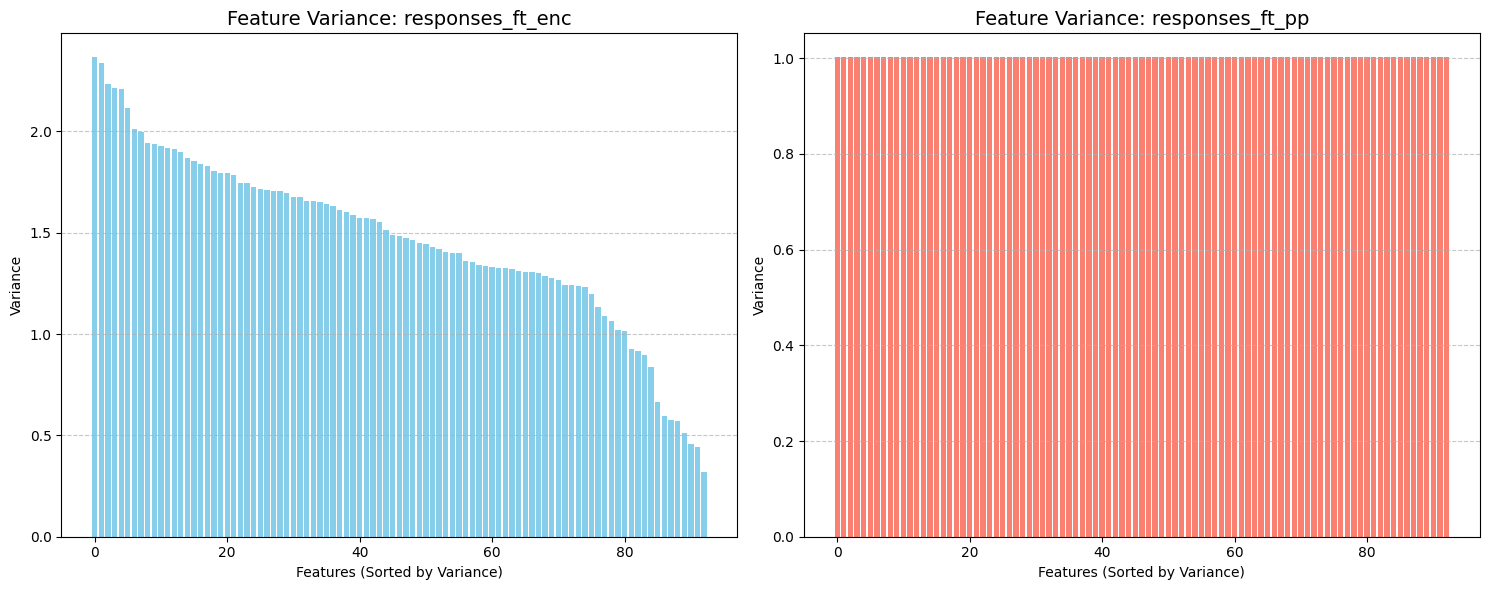

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot for responses_ft_enc
axes[0].bar(range(len(sorted_variance_enc)), sorted_variance_enc.values, color='skyblue')
axes[0].set_title('Feature Variance: responses_ft_enc', fontsize=14)
axes[0].set_xlabel('Features (Sorted by Variance)')
axes[0].set_ylabel('Variance')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for responses_ft_pp
axes[1].bar(range(len(sorted_variance_pp)), sorted_variance_pp.values, color='salmon')
axes[1].set_title('Feature Variance: responses_ft_pp', fontsize=14)
axes[1].set_xlabel('Features (Sorted by Variance)')
axes[1].set_ylabel('Variance')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Comment the results obtained for the variances (max 150 words):
...

#### Write the code for computing all the $n$ PCs of the two datasets, separately, and for visualizing the curves of cumulative explained variances:

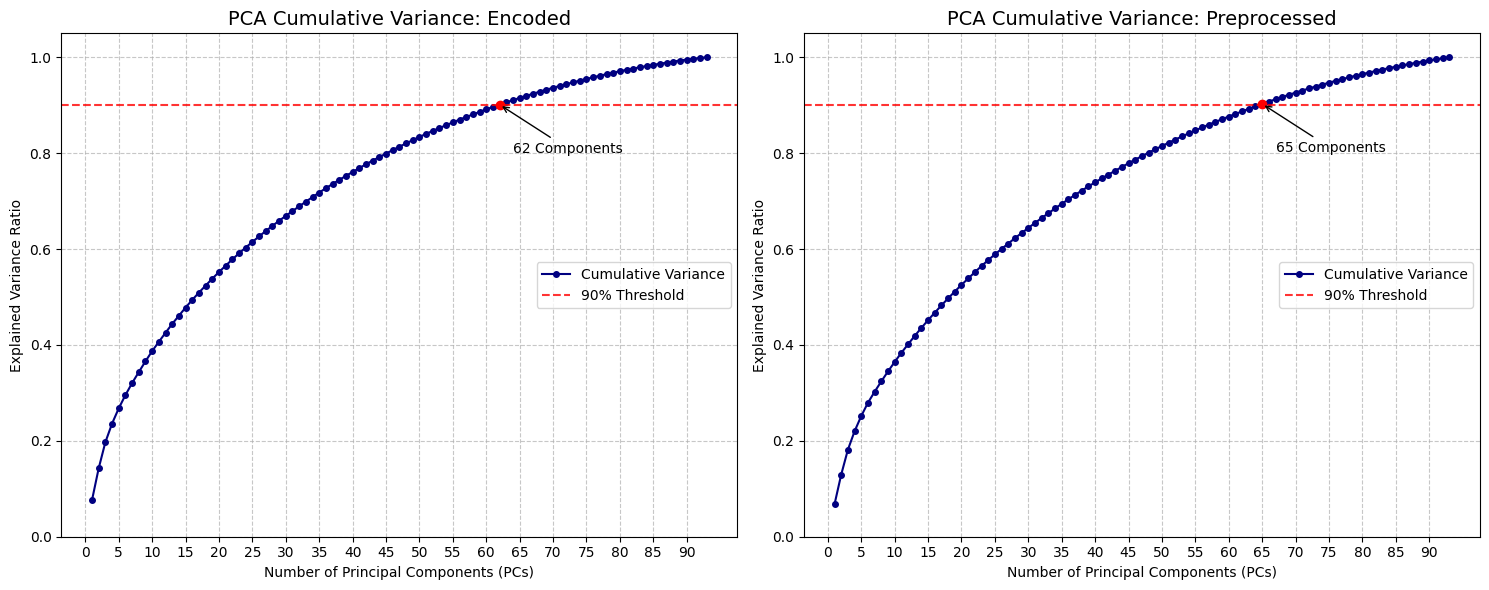

In [23]:
def plot_pca_cumulative(data, title, ax):
    # 1. Fit PCA
    pca = PCA()
    pca.fit(data)
    
    # 2. Calculations
    exp_var = pca.explained_variance_ratio_
    cum_var = np.cumsum(exp_var)
    n_components = len(exp_var)
    x = np.arange(1, n_components + 1)
    
    #ax.bar(x, exp_var, alpha=0.6, color='skyblue', label='Individual Variance', align='center')
    ax.plot(x, cum_var, marker='o', linestyle='-', markersize=4, color='navy', label='Cumulative Variance')
    threshold = 0.90
    ax.axhline(y=threshold, color='r', linestyle='--', alpha=0.8, label=f'{int(threshold*100)}% Threshold')
    
    # first component crossing 90%
    idx_threshold = np.argmax(cum_var >= threshold) 
    val_threshold = x[idx_threshold] 
    
    # Draw point and text
    ax.plot(val_threshold, cum_var[idx_threshold], 'ro') 
    ax.annotate(f'{val_threshold} Components', 
                xy=(val_threshold, cum_var[idx_threshold]), 
                xytext=(val_threshold + 2, cum_var[idx_threshold] - 0.1),
                arrowprops=dict(arrowstyle="->", color='black'))
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Number of Principal Components (PCs)')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_ylim(0, 1.05)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # X-axis ticks management
    if n_components > 20:
        ax.set_xticks(np.arange(0, n_components + 1, 5))
    else:
        ax.set_xticks(x)

    ax.legend(loc='center right')
    return pca

# Create figure for side-by-side comparison
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Run and plot for Encoded dataset
pca_enc = plot_pca_cumulative(responses_ft_enc, 'PCA Cumulative Variance: Encoded', axes[0])

# Run and plot for Preprocessed dataset
pca_pp = plot_pca_cumulative(responses_ft_pp, 'PCA Cumulative Variance: Preprocessed', axes[1])

plt.tight_layout()
plt.show()

# This visualization help to decide how many components are needed to explain a 
# specific percentage of the data's variability.

#### Comment the results obtained for the cumulative explained variances, knowing the vaues in the datasets and the fetures' variances (max 150 words):

...

## Exercise 3. Dimensionality Reduction and PC Interpretation

In this exercise, you have to do the following operations:
1. For the dataset *responses_ft_pp*, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
1. Visualize as a barplot the explained variance (as percentage) for each PC, and report the preserved explained variance (as percentage) by the $m$ PCs.
1. Visualize all the PCs as barplots and give an interpretation and a name to them, **motivating your choices**.
1. Transform the *responses_ft_pp* data into their $m$-dimensional representation via PCA. Store the transformed data in the variable *responses_ft_pca*;
1. Visualize the the score graph. If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs (given at the previous step) on the axes** for better understanding the results.

#### Write the code for computing the new PCA, for visualizing the $m$ PCs as barplots:

In [24]:
# 1. Find m' (number of components needed for 33% variance)
# We use the full PCA computed in the previous step
cumulative_variance = np.cumsum(pca_pp.explained_variance_ratio_)
m_prime = np.argmax(cumulative_variance >= 0.33) + 1  # +1 because indices start at 0

m = min(m_prime, 5)

print(f"Components needed for 33% variance (m'): {m_prime}")
print(f"Selected dimension m = min({m_prime}, 5): {m}")

# 3. Compute new PCA for dimensionality reduction with m components
pca_reduced = PCA(n_components=m)
responses_ft_pp_reduced = pca_reduced.fit_transform(responses_ft_pp)

print(f"Original shape: {responses_ft_pp.shape}")
print(f"Reduced shape: {responses_ft_pp_reduced.shape}")

Components needed for 33% variance (m'): 9
Selected dimension m = min(9, 5): 5
Original shape: (506, 93)
Reduced shape: (506, 5)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/pyth

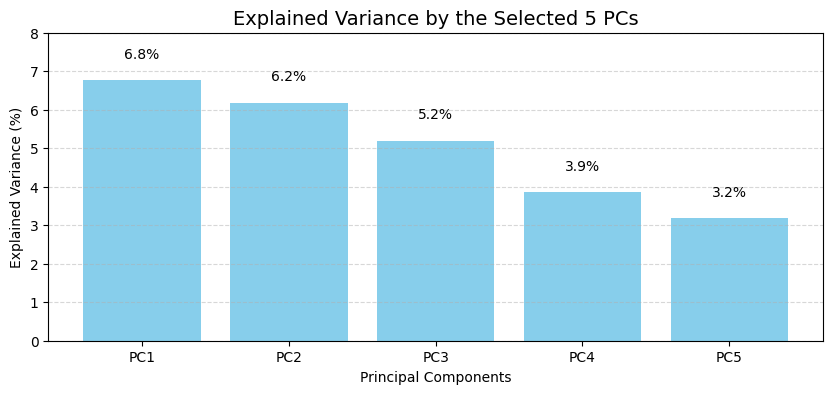


Total preserved explained variance by the 5 PCs: 25.17%


In [25]:
# 2. Visualize as a barplot the explained variance (as percentage) for each PC,
# and report the preserved explained variance (as percentage) by the $m$ PCs.

m_variances = pca_pp.explained_variance_ratio_[:m] * 100 # Convert to percentage
pc_labels = [f'PC{i+1}' for i in range(m)]
# 4. Visualization: Bar Plot
plt.figure(figsize=(10, 4))
bars = plt.bar(pc_labels, m_variances, color='skyblue')

# Add text labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom')

plt.title(f'Explained Variance by the Selected {m} PCs', fontsize=14)
plt.ylabel('Explained Variance (%)')
plt.xlabel('Principal Components')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, 8)
plt.show()

# 5. Report Preserved Variance
total_preserved = np.sum(m_variances)
print(f"\nTotal preserved explained variance by the {m} PCs: {total_preserved:.2f}%")

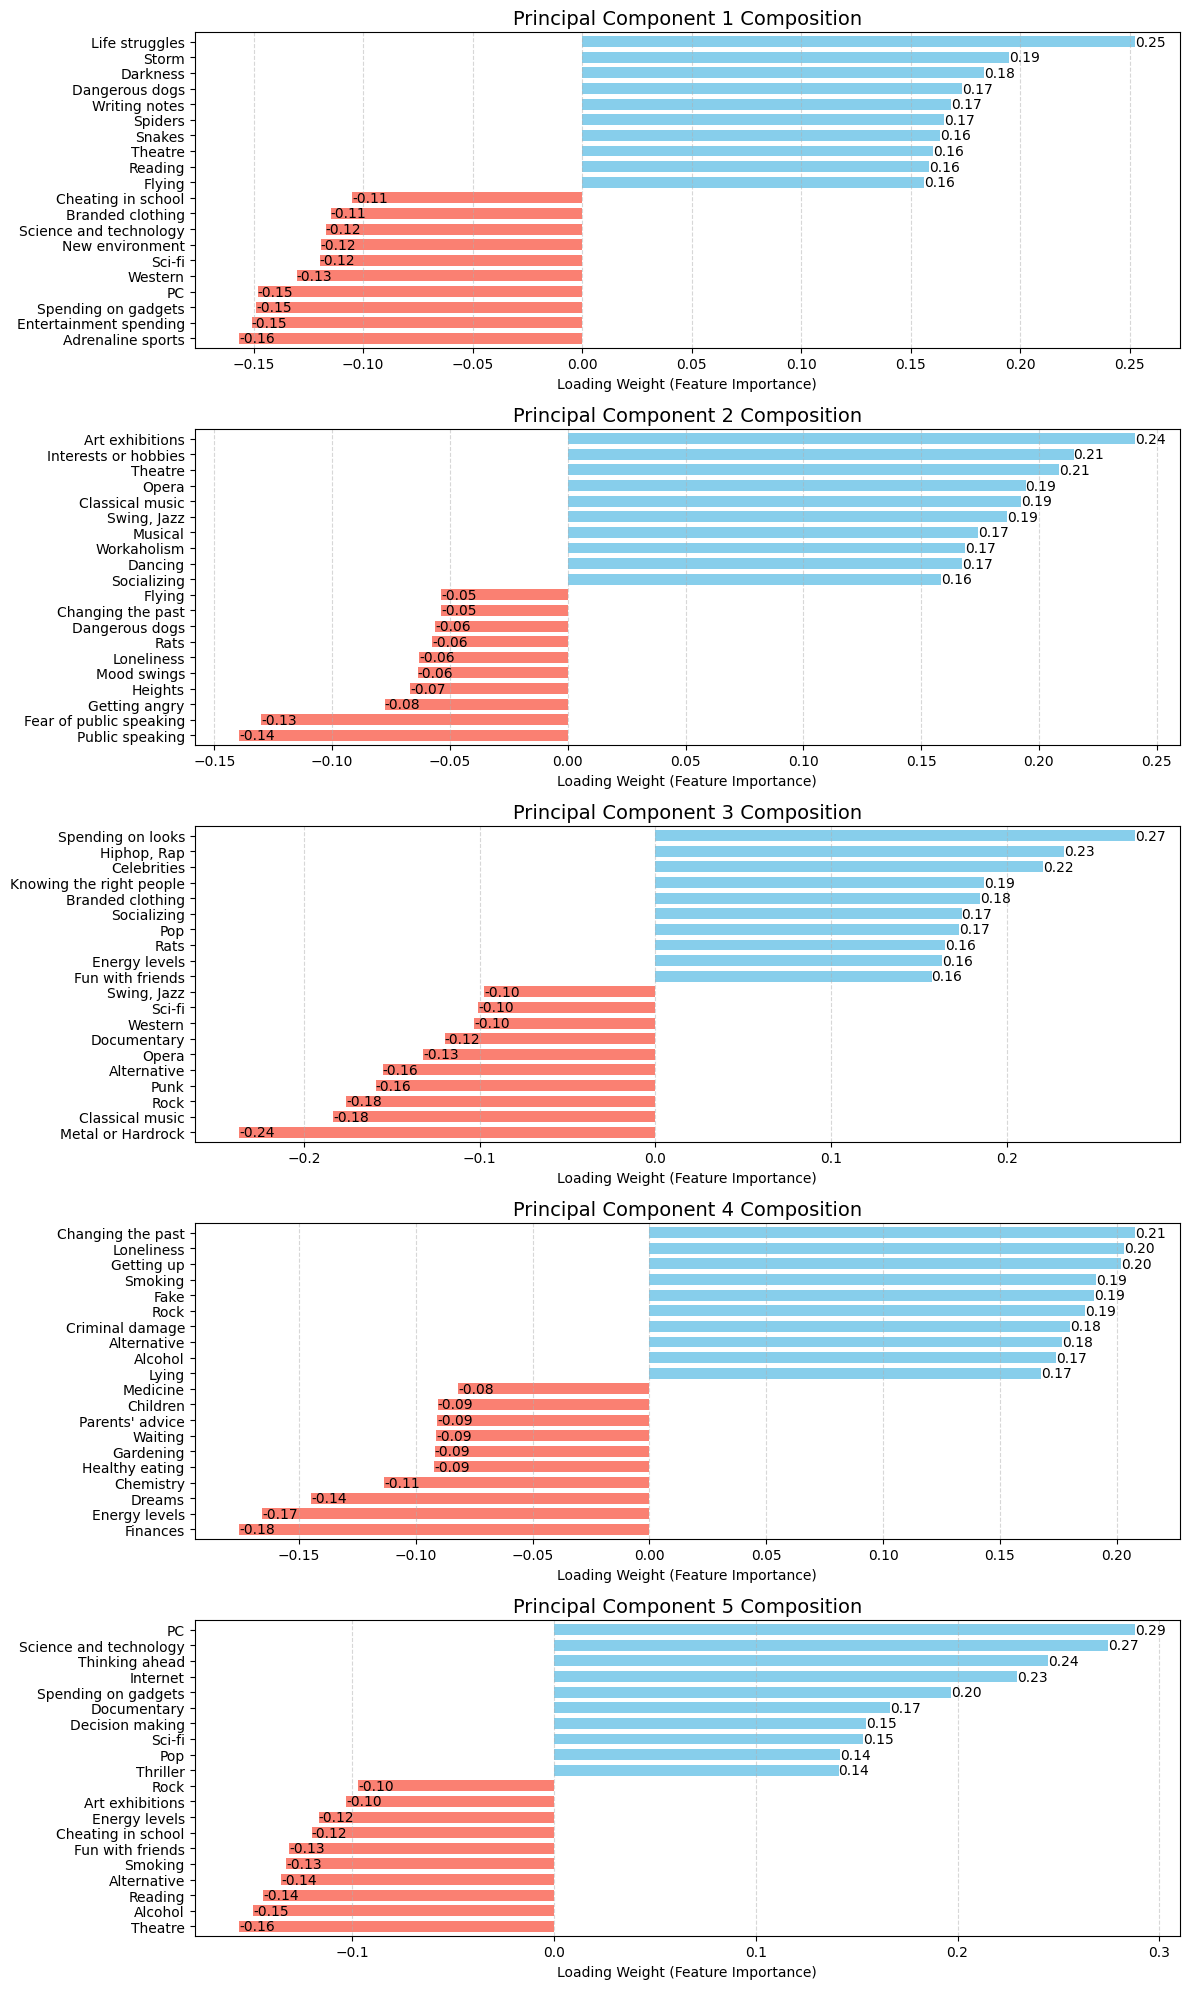

Index(['Finances', 'Branded clothing', 'Entertainment spending',
       'Spending on looks', 'Spending on gadgets',
       'Spending on healthy eating', 'Smoking', 'Alcohol', 'Healthy eating',
       'Psychology', 'Politics', 'Internet', 'PC', 'Chemistry', 'Reading',
       'Geography', 'Medicine', 'Art exhibitions', 'Religion',
       'Countryside, outdoors', 'Dancing', 'Writing', 'Active sport',
       'Gardening', 'Celebrities', 'Science and technology', 'Theatre',
       'Fun with friends', 'Adrenaline sports', 'Movies', 'Horror', 'Thriller',
       'Comedy', 'Sci-fi', 'Animated', 'Documentary', 'Western',
       'Slow songs or fast songs', 'Classical music', 'Musical', 'Pop', 'Rock',
       'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska',
       'Swing, Jazz', 'Alternative', 'Opera', 'Writing notes', 'Workaholism',
       'Thinking ahead', 'Final judgement', 'Loss of interest', 'Funniness',
       'Fake', 'Criminal damage', 'Decision making', 'Judgment calls',
       'Hy

In [26]:
# 3. Visualize all the PCs as barplots and give an 
# interpretation and a name to them, **motivating your choices**.
pcs = pca_reduced.components_[:m]
feature_names = responses_ft_pp.columns

def plot_pcs(pcs, features, m):
    fig, axes = plt.subplots(m, 1, figsize=(12, 4 * m))
    
    # If m=1, axes is not a list, so we make it one
    if m == 1: axes = [axes]
    
    for i in range(m):
        # Create a dataframe for the specific PC
        pc_loadings = pd.Series(pcs[i], index=features)
        
        # Sort to find the most influential features
        sorted_loadings = pc_loadings.sort_values()
        top_negative = sorted_loadings.head(m+5)
        top_positive = sorted_loadings.tail(m+5)
        
        # Combine them for plotting
        top_features = pd.concat([top_negative, top_positive])
        
        # Color coding: Red for negative, Blue for positive
        colors = ['salmon' if x < 0 else 'skyblue' for x in top_features.values]
        
        # Plot
        ax = axes[i]
        top_features.plot(kind='barh', ax=ax, color=colors, width=0.7)
        ax.set_title(f'Principal Component {i+1} Composition', fontsize=14)
        ax.set_xlabel('Loading Weight (Feature Importance)')
        ax.grid(axis='x', linestyle='--', alpha=0.5)
        
        # Add values to the bars for clarity
        for index, value in enumerate(top_features.values):
            ax.text(value, index, f'{value:.2f}', va='center')

    plt.tight_layout()
    plt.show()

# 3. Run the visualization
plot_pcs(pcs, feature_names, m)
print(feature_names)

### PCs Names and Motivations
- **PC1**:"Ansietà e Fobie vs. Ricerca di Adrenalina"
  - persone ansiose, emotive e caute (valori alti) 
  - persone temerarie, razionali e "Sensation Seekers" (valori bassi).
- **PC2** : "High Culture vs. Social Anxiety"
  - I pesi positivi sono dominati in modo schiacciante da attività legate alla "Cultura Alta" e alle arti.
  - Le feature con pesi negativi (anche se meno forti in valore assoluto rispetto a quelli positivi) riguardano principalmente paure sociali e instabilità emotiva.
- **PC3**: "Trendy & Mainstream vs. Alternative Rocker"
  - Immagine e Popolarità: Questo lato descrive una persona molto attenta all'immagine esteriore, alle tendenze e allo status sociale.
  - Cultura Alternativa e Rock: Il lato negativo è quasi interamente dominato da generi musicali e interessi che si discostano dal mainstream commerciale o che appartengono a sottoculture specifiche.
- **PC4**: The Troubled Soul vs. The Balanced Planner
  - Disagio Emotivo: Questo lato descrive una persona che sembra attraversare un momento di difficoltà psicologica o comportamentale.
  - Equilibrio e Salute: Il lato opposto dipinge il ritratto della stabilità, della salute e della pianificazione.
- **PC5**: Tech/Rational vs. Social/Artistic

In [27]:
# 4. Transform the *responses_ft_pp* data into their $m$-dimensional 
# representation via PCA. Store the transformed data in the 
# variable *responses_ft_pca*;
responses_ft_pca = pca_reduced.fit_transform(responses_ft_pp)

# Verifica delle dimensioni (opzionale, ma consigliato per capire)
print(f"Dimensione originale: {responses_ft_pp.shape}")
print(f"Dimensione trasformata: {responses_ft_pca.shape}")

Dimensione originale: (506, 93)
Dimensione trasformata: (506, 5)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Library/Frameworks/Python.framework/Versions/3.13/lib/pyth

In [28]:
import plotly.express as px
import pandas as pd
### DA TOGLIERE PRIMA DI CONSEGNA 
# 1. Creiamo un DataFrame temporaneo per facilitare il plotting
# Prendiamo solo i primi 3 componenti
df_pca = pd.DataFrame(responses_ft_pca[:, :3], columns=['PC1', 'PC2', 'PC3'])

# 2. Definiamo i nomi (recuperati dagli step precedenti)
pc_names = [
    "Fear & Anxiety vs. Adrenaline",        # PC1
    "The Cultured Intellectual",            # PC2
    "Mainstream vs. Alternative",           # PC3
]

# 3. Creiamo il grafico interattivo
fig = px.scatter_3d(
    df_pca, 
    x='PC1', 
    y='PC2', 
    z='PC3',
    title='Interactive Score Graph (3D)',
    opacity=0.6, # Trasparenza per vedere i punti sovrapposti
)

# 4. Personalizziamo gli assi con i nomi interpretati
fig.update_layout(
    scene = dict(
        xaxis_title=f"PC1: {pc_names[0]}",
        yaxis_title=f"PC2: {pc_names[1]}",
        zaxis_title=f"PC3: {pc_names[2]}",
    ),
    margin=dict(l=0, r=0, b=0, t=40) # Riduce i margini bianchi
)

# 5. Modifica l'aspetto dei punti (più piccoli e blu)
fig.update_traces(marker=dict(size=3, color='skyblue', line=dict(width=0.5, color='navy')))

fig.show()

ModuleNotFoundError: No module named 'plotly'

#### For each PC, write the name you assigned to it and a brief interpretation that motivate the choice (max 100 words per PC):

...

#### Write the code for visualizing the score graph (with PC names on the axis):

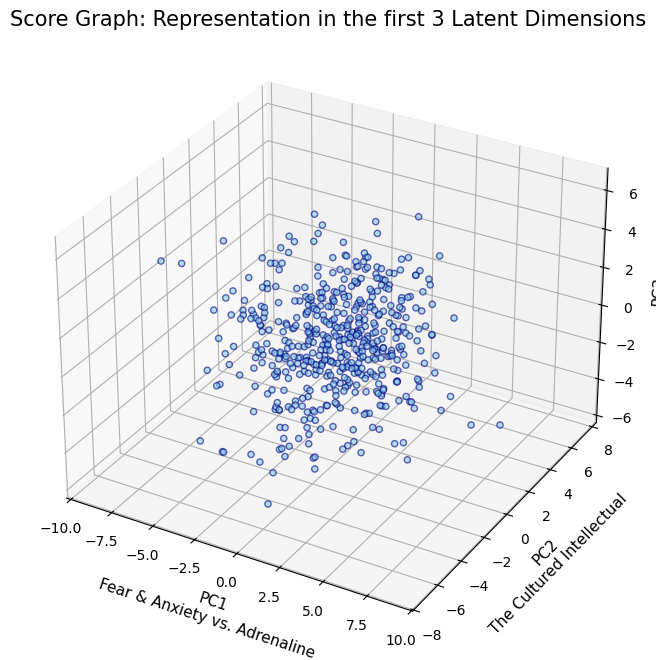

In [29]:
#%matplotlib widget
# 1. Define the names we gave to the PCs
pc_names = [
    "Fear & Anxiety vs. Adrenaline",        # PC1
    "The Cultured Intellectual",            # PC2
    "Mainstream vs. Alternative",           # PC3
    "Troubled Soul vs. Balanced Planner",   # PC4
    "Tech/Rational vs. Social/Artistic"     # PC5
]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract data for the first 3 components
xs = responses_ft_pca[:, 0]
ys = responses_ft_pca[:, 1]
zs = responses_ft_pca[:, 2]

# Create the scatter plot
# c='skyblue' sets the color, alpha=0.6 makes points semi-transparent to see overlapping
scatter = ax.scatter(xs, ys, zs, c='skyblue', edgecolor='navy', s=20, alpha=0.6)

# 3. Label the axes with the interpreted names
ax.set_xlabel(f"\nPC1\n{pc_names[0]}", fontsize=11) 
ax.set_ylabel(f"\nPC2\n{pc_names[1]}", fontsize=11)
ax.set_zlabel(f"\nPC3\n{pc_names[2]}", fontsize=11)

ax.set_title('Score Graph: Representation in the first 3 Latent Dimensions', fontsize=15)

plt.show()

## Exercise 4. $k$-Means

In this exercise, you have to do the following operations:
1. Run the $k$-Means for clustering the data of *responses_ft_pca*, **setting the input argument *random_state* equal to the variable *random_seed*** (i.e., the minimum of the Student IDs).

   In particular, **use the silohuette score for identifying the best value for $k\in\{3, \ldots, 10\}$** and show it by plotting how the score changes w.r.t. $k$.
1. Plot the score graph again, but add the centroids of the cluster and color the points according to their cluster.
1. Visualize the centroids coordinates as barplots and **give a name and an interpretation to them by exploiting the PC names**.


#### Write the code for performing the items of the list above:

Optimal number of clusters (k): 4


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: in

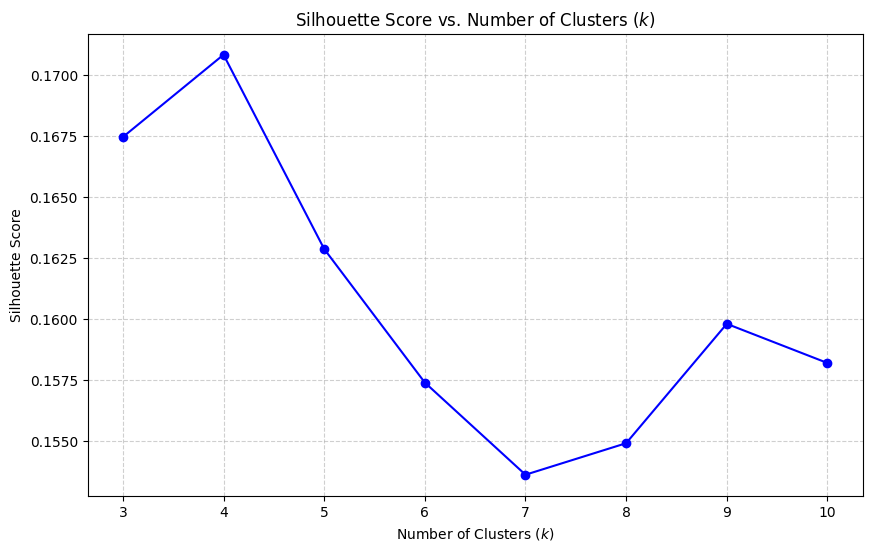

In [33]:
# ==========================================
# 1. Hyperparameter Tuning (Silhouette Score)
# ==========================================

silhouette_scores = []
k_values = range(3, 11)  # k from 3 to 10

# Calculate Silhouette Score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=random_seed, n_init=10)
    labels = kmeans.fit_predict(responses_ft_pca)
    
    score = silhouette_score(responses_ft_pca, labels)
    silhouette_scores.append(score)

# SILHOUETTE SCORE IS THE RESULT OF THIS FORMULA: 
#           (b - a)/max(a,b)
# where a is the distance from the point to all the other points in the same cluster: cohesion
# and b is the avg distance of the point to all the points in the nearest neighbour cluster: separation 

# Find the best k (highest score)
best_k_idx = np.argmax(silhouette_scores)
best_k = k_values[best_k_idx]

print(f"Optimal number of clusters (k): {best_k}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score vs. Number of Clusters ($k$)')
plt.xlabel('Number of Clusters ($k$)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


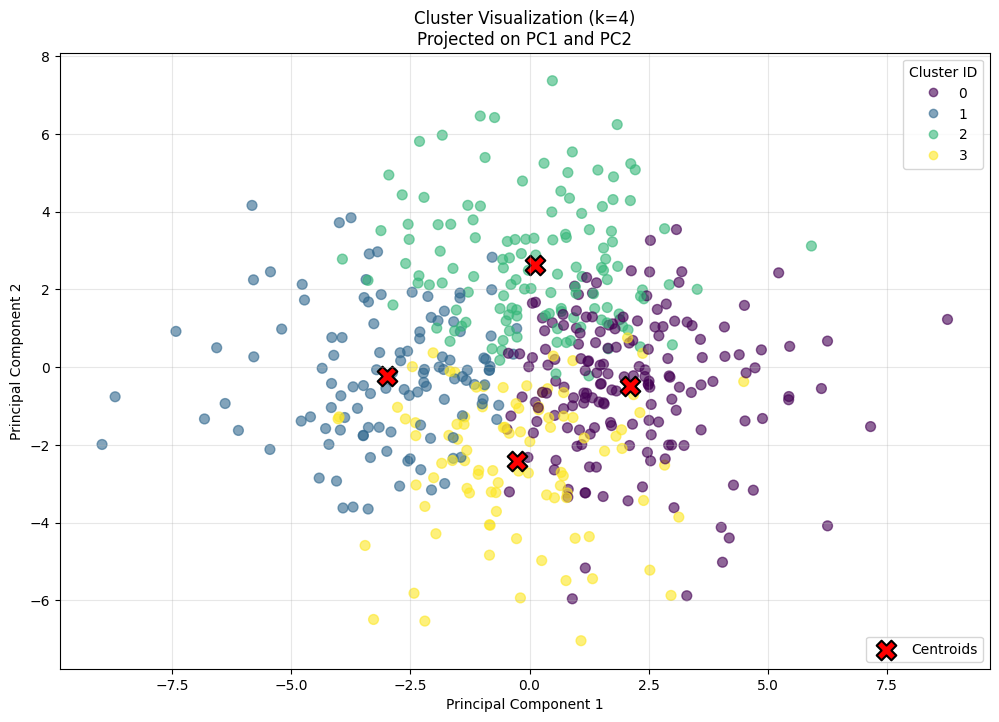

In [37]:
# Run k-Means with the best k
kmeans_final = KMeans(n_clusters=best_k, random_state=random_seed, n_init=10)
cluster_labels = kmeans_final.fit_predict(responses_ft_pca)
centroids = kmeans_final.cluster_centers_

plt.figure(figsize=(12, 8))

# Scatter plot: PC1 (column 0) vs PC2 (column 1)
# We use the array column indices 0 and 1
scatter = plt.scatter(
    responses_ft_pca[:, 0], 
    responses_ft_pca[:, 1], 
    c=cluster_labels, 
    cmap='viridis', 
    s=50, 
    alpha=0.6
)

# Overlay Centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1], 
    c='red', marker='X', s=200, edgecolors='black', linewidth=1.5, label='Centroids'
)

# create legend elements manually for the clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Cluster ID", loc="upper right")
plt.gca().add_artist(legend1)
plt.legend(loc='lower right') # Legend for centroids

plt.title(f'Cluster Visualization (k={best_k})\nProjected on PC1 and PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.show()

In [42]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib widget
# --- Assumiamo che 'kmeans_final' e 'best_k' siano già stati calcolati ---
# Se non lo sono, esegui prima la parte di codice precedente per trovare best_k.

# 1. Recuperiamo le etichette e i centroidi (se non già fatto)
cluster_labels = kmeans_final.predict(responses_ft_pca)
centroids = kmeans_final.cluster_centers_

# 2. Setup del grafico 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# 3. Dati: Prendiamo le prime 3 colonne (PC1, PC2, PC3)
x = responses_ft_pca[:, 0]
y = responses_ft_pca[:, 1]
z = responses_ft_pca[:, 2]

# 4. Scatter plot dei punti dati
scatter = ax.scatter(x, y, z, c=cluster_labels, cmap='viridis', s=40, alpha=0.6, label='Data Points')

# 5. Scatter plot dei centroidi (coordinate sulle prime 3 PC)
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='red', marker='X', s=300, edgecolors='black', linewidth=1.5, label='Centroids'
)

# 6. Etichette assi e Titolo
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title(f'3D Cluster Visualization (k={best_k})\nPC1, PC2, PC3')

# 7. Legenda
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster ID", loc="upper right")
ax.add_artist(legend1)
ax.legend(loc='upper left') # Legenda per i centroidi

plt.show()

RuntimeError: 'widget' is not a recognised GUI loop or backend name

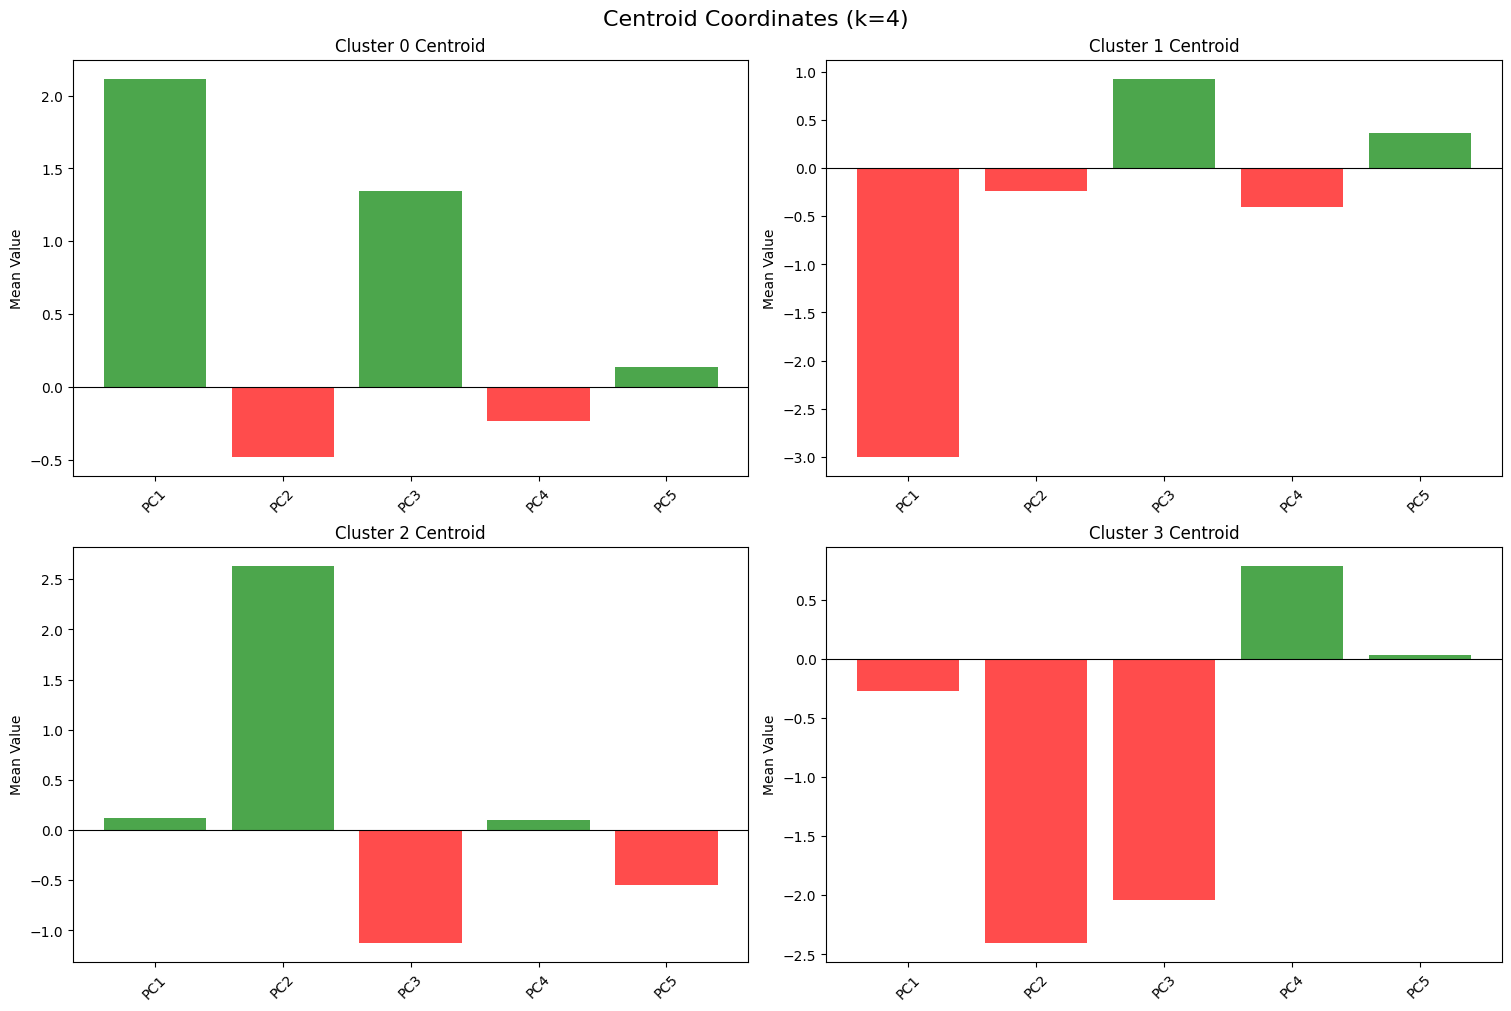

In [40]:
num_features = responses_ft_pca.shape[1]
pc_names = [f"PC{i+1}" for i in range(num_features)]

# Grid setup for subplots
n_cols = 2
n_rows = math.ceil(best_k / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i in range(best_k):
    # Color coding: Green for positive, Red for negative
    values = centroids[i]
    colors = ['green' if x >= 0 else 'red' for x in values]
    
    axes[i].bar(pc_names, values, color=colors, alpha=0.7)
    axes[i].axhline(0, color='black', linewidth=0.8)
    axes[i].set_title(f'Cluster {i} Centroid')
    axes[i].set_ylabel('Mean Value')
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots if best_k is odd
for j in range(best_k, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle(f'Centroid Coordinates (k={best_k})', fontsize=16)
plt.show()

#### For each Centroid, write the name you assigned to it and a brief interpretation that motivate the choice by exploiting the PC names(max 100 words per centroid):

...

## Exercise 5. Cluster External Evaluations

In this exercise, you have to do the following operations:
1. Select a subset meaningful labels for performing an external evaluation of the clustering results.
1. For each selected label, visualize the distribution of the label in each cluster and in the whole dataset.
1. Visualize the score graph with dots colored with respect to the label value; then, visualize the clusters in separated score-graphs, coloring the points according to the label values.


#### List the Labels you consider meaningful for an external cluster evaluation and motivate your choice (max 50 words per label):

...


#### Write the code for the visualizations cited in item 2 above:

In [ ]:
# [write the code here]

#### For each selected label, comment the results observed in the visualizations (max 100 words per label):

...

## Exercise 6. Cluster Internal Evaluations

In this exercise, you have to do the following operations:
1. For each cluster, measure the corresponding average silhouette score
1. Visualize the silhouette of the clusters and the general one of the clustering and compare them


#### Write the code for computing the silhouette scores and for visualizing them:

In [ ]:
# [write the code here]

#### Comment the results, also considering the results observed previously (e.g., score graphs, centroids, etc. - max 150 words):

...